<a href="https://colab.research.google.com/github/dwmhr12/Python/blob/main/FORECASTING%20TOTAL%20PEMAKAIAN%20TENAGA%20LISTRIK%20MENGGUNAKAN%20MODEL%20HYBRID%20ARIMA-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORECASTING TOTAL PEMAKAIAN TENAGA LISTRIK MENGGUNAKAN MODEL HYBRID ARIMA-SVM

Anggota Kelompok:

Evanriza Safiq Ariadi 			(5026211139)

Muhammad Rhakan			(5026211166)

Dewi Maharani 			(5026221046)


## **Metodologi**

Penyelesaian metode hybrid dengan menggunakan ARIMA dan SVM adalah sebagai berikut:
1. Data Collection
2. Exploratory Data Analysis
3. Data Preprocessing
4. Data Splitting
5. Model Fitting & Parameter Estimation
6. Performance Evaluation



### **Forecasting Methods**
**1. ARIMA**

  Arima is used to generate the prediction (represented by 'L')
- Uji ADF
- Uji ACF & PACF
- Generate data forecasting
- Determine the residue

**2. SVM**

  SVM is used to generate the residue (represented by 'N')
- Using the residue from ARIMA

**3. Hybrid Method**

  The calculation of both models. The forecasting result from ARIMA and the residu from SVM are both summed.

### Prerequisite

In [ ]:
#Import Basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

### Data Collection

In [ ]:
#Import Dataset
df = pd.read_excel("PMA.xlsx")

In [ ]:
#Dataset Head
df.head(3)

,PERIODE,JBR,GSK,PMK
0,2004-01-01,924674.0,263849.0,930283.0
1,2004-02-01,925009.0,264080.0,931837.0
2,2004-03-01,925057.0,264149.0,931837.0


### Preprocessing

In [ ]:
#Set 'PERIODE' as index
df = df.set_index('PERIODE')

In [ ]:
#Check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 234 entries, 2004-01-01 to 2023-06-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JBR     234 non-null    float64
 1   GSK     234 non-null    float64
 2   PMK     234 non-null    float64
dtypes: float64(3)
memory usage: 7.3 KB


In [ ]:
#Set all columns type to integer
for col in df.columns:
  df[col] = df[col].astype(int)

In [ ]:
#Statistic description
df.describe()

,JBR,GSK,PMK
count,234.000000,234.000000,2.340000e+02
mean,963086.726496,390741.871795,9.954754e+05
std,22105.236179,142858.274394,2.565399e+04
min,923117.000000,263849.000000,9.302830e+05
25%,941857.500000,302139.750000,9.783568e+05
50%,971954.500000,314435.000000,1.000692e+06
75%,983337.250000,455808.500000,1.016210e+06
max,986326.000000,798264.000000,1.029899e+06


## **Exploratory Data Analysis**

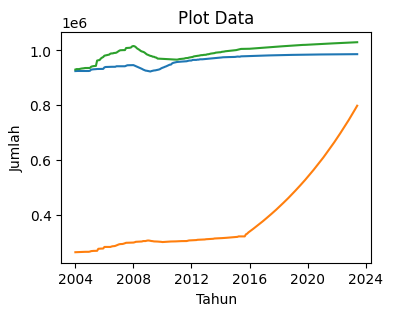

In [ ]:
#Plotting Data
plt.figure(figsize = (4, 3))
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Plot Data")
plt.plot(df)

## **Auto Regressive Integrated Moving Average Preparation**

In [ ]:
df.tail(10)

,JBR,GSK,PMK
PERIODE,,,
2022-09-01,986071,732056,1028061
2022-10-01,986102,739133,1028270
2022-11-01,986132,746278,1028477
2022-12-01,986162,753492,1028683
2023-01-01,986191,760775,1028889
2023-02-01,986219,768129,1029093
2023-03-01,986247,775555,1029296
2023-04-01,986274,783052,1029498
2023-05-01,986300,790621,1029699


In [ ]:
#Separate each column
jbr = df['JBR ']
gsk = df['GSK']
pmk = df['PMK']

### Determine Stationary by ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = {"adf_jbr" : jbr,
       "adf_gsk" : gsk,
       "adf_pmk" : pmk}

# Labels all the compontents of ADF
labels = [
    'ADF Statistic',
    'p-value',
    'Used Lag',
    'Number of Observations',
    'Critical Values',
    'Maximum Information Criterion'
]

# Iterate through the time series data
for name, series in adf.items():
    adf_result = adfuller(series)
    print(f'ADF Test Results for {name}:')
    for label, value in zip(labels, adf_result):
        print(f'{label}: {value}')
    p_value = adf_result[1]
    if p_value < 0.05:
        print('Data stasioner')
    else:
        print('Data tidak stasioner, perlu dilakukan differencing')
    print('\n')


ADF Test Results for adf_jbr:
ADF Statistic: -1.0995767169082857
p-value: 0.7152406760495255
Used Lag: 15
Number of Observations: 218
Critical Values: {'1%': -3.460707667106296, '5%': -2.874891213486339, '10%': -2.573885987711472}
Maximum Information Criterion: 3455.281689018826
Data tidak stasioner, perlu dilakukan differencing


ADF Test Results for adf_gsk:
ADF Statistic: 1.2783958017166646
p-value: 0.9964851902621912
Used Lag: 6
Number of Observations: 227
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}
Maximum Information Criterion: 3587.092091897362
Data tidak stasioner, perlu dilakukan differencing


ADF Test Results for adf_pmk:
ADF Statistic: -2.642707852137284
p-value: 0.08448770006630785
Used Lag: 6
Number of Observations: 227
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}
Maximum Information Criterion: 3827.133067386329
Data tidak stasioner, perlu dilakukan differencing




### Differencing for Parameter d

In [ ]:
# Function to perform ADF test and determine stationarity
def check_stasioner(series, name):
    d = 0
    while True:
        adf_result = adfuller(series.dropna())
        # Menghitung nilai p-value
        p_value = adf_result[1]

        # Melihat kondisi data di iterasi ke-d
        print(f'Kondisi data {name} di differencing ke-{d}:')
        for label, value in zip(labels, adf_result):
            print(f'{label}: {value}')

        if p_value < 0.05:
            print('Data stasioner')             # Jika data stasioner, berhenti
            break
        else:
            print('Data tidak stasioner')
            d += 1                              # Jika data tidak stasioner, lakukan iterasi agar terjadi differencing selanjutnya
            series = series.diff().dropna()

        print()

# Iterate through the time series data and check for stationarity
for name, series in adf.items():
    check_stasioner(series, name)
    print()

Kondisi data adf_jbr di differencing ke-0:
ADF Statistic: -1.0995767169082857
p-value: 0.7152406760495255
Used Lag: 15
Number of Observations: 218
Critical Values: {'1%': -3.460707667106296, '5%': -2.874891213486339, '10%': -2.573885987711472}
Maximum Information Criterion: 3455.281689018826
Data tidak stasioner

Kondisi data adf_jbr di differencing ke-1:
ADF Statistic: -4.570203689398931
p-value: 0.0001465280170014774
Used Lag: 14
Number of Observations: 218
Critical Values: {'1%': -3.460707667106296, '5%': -2.874891213486339, '10%': -2.573885987711472}
Maximum Information Criterion: 3438.079594227162
Data stasioner

Kondisi data adf_gsk di differencing ke-0:
ADF Statistic: 1.2783958017166646
p-value: 0.9964851902621912
Used Lag: 6
Number of Observations: 227
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}
Maximum Information Criterion: 3587.092091897362
Data tidak stasioner

Kondisi data adf_gsk di differencing ke-1:
ADF Statistic: 0

In [ ]:
#Initialization Variables for Differencing

#jbr single differencing
jbr_diff = jbr.diff().dropna()

#gsk double differencing
gsk_diff = gsk.diff().dropna()
gsk_diff_2 = gsk_diff.diff().dropna()

#pmk single differencing
pmk_diff = pmk.diff().dropna()

<Axes: xlabel='PERIODE'>

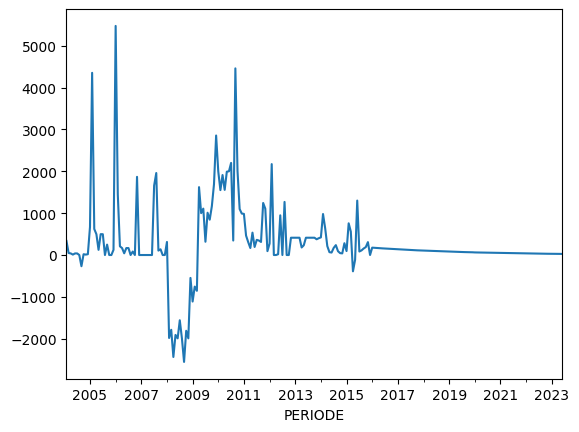

In [ ]:
jbr_diff.plot()

<Axes: xlabel='PERIODE'>

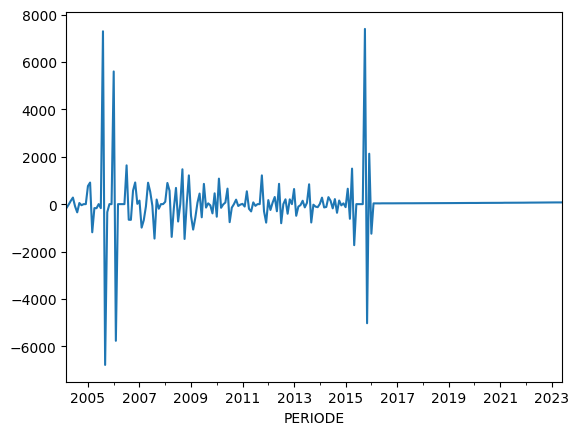

In [ ]:
gsk_diff_2.plot()

<Axes: xlabel='PERIODE'>

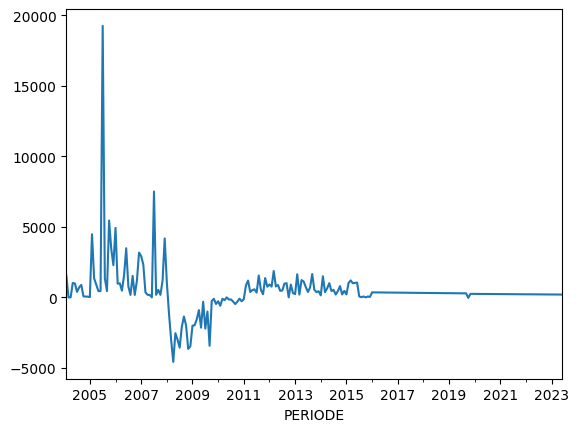

In [ ]:
pmk_diff.plot()

### Plot ACF PACF for Parameter p,q

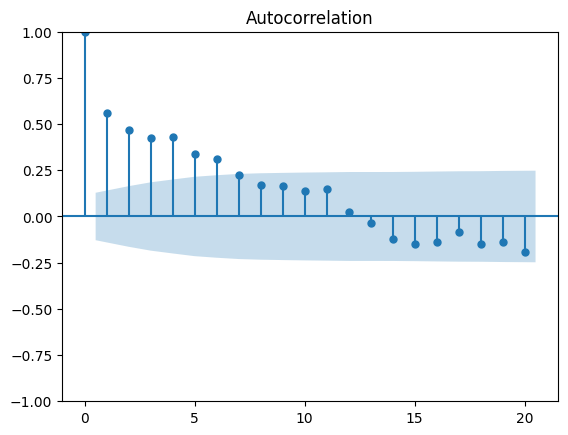

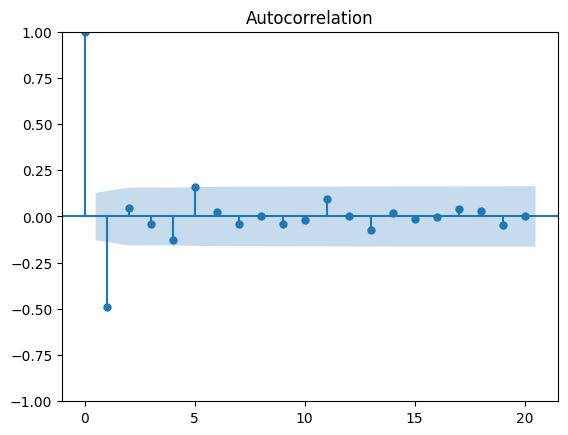

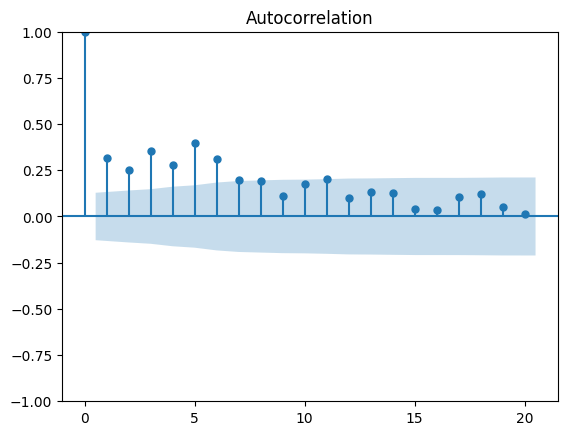

In [ ]:
# Plot PACF

from statsmodels.graphics.tsaplots import plot_acf

acf_jbr = plot_acf(jbr_diff, lags=20)
acf_gsk = plot_acf(gsk_diff_2, lags=20)
acf_pmk = plot_acf(pmk_diff, lags=20)

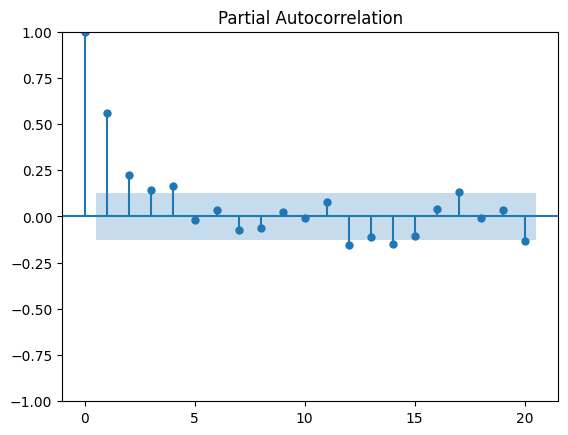

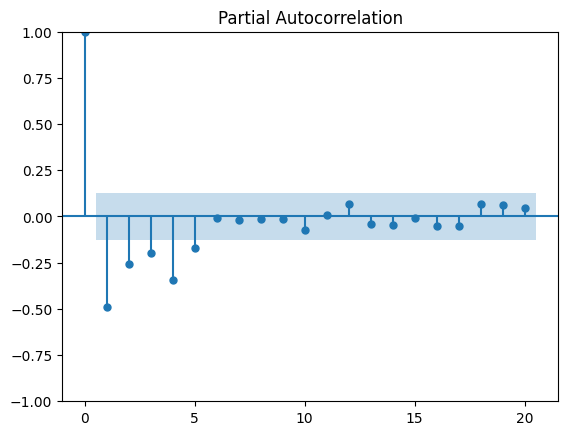

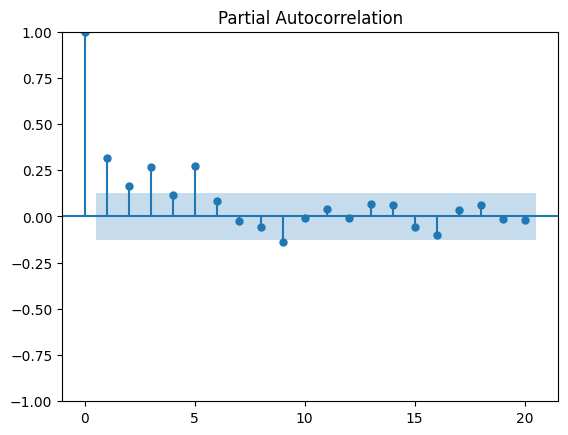

In [ ]:
# Plot PACF

from statsmodels.graphics.tsaplots import plot_pacf

pacf_jbr = plot_pacf(jbr_diff, lags=20)
pacf_gsk = plot_pacf(gsk_diff_2, lags=20)
pacf_pmk = plot_pacf(pmk_diff, lags=20)

## ARIMA-SVM Model Implementation

In [ ]:
# Generate a function for modelling
def arima_svm_hybrid(data, arima_order, train_size):
    # Split the data
    train, test = train_test_split(data, train_size=train_size, shuffle=False)

    # Fit ARIMA model
    arima_model = ARIMA(train, order=arima_order)
    arima_result = arima_model.fit()

    # Get ARIMA residuals
    arima_residuals = arima_result.resid

    # Prepare data for SVM
    X = np.arange(len(train)).reshape(-1, 1)
    y = arima_residuals

    # Fit SVM model
    svm_model = SVR(kernel='rbf')
    svm_model.fit(X, y)

    # Make predictions
    arima_forecast = arima_result.forecast(steps=len(test))
    svm_forecast = svm_model.predict(np.arange(len(train), len(data)).reshape(-1, 1))

    # Combine ARIMA and SVM forecasts
    hybrid_forecast = arima_forecast + svm_forecast

    # ARIMA Evaluation
    mse_arima = mean_squared_error(test, arima_forecast)
    mae_arima = mean_absolute_error(test, arima_forecast)
    mape_arima = np.mean(np.abs((test - arima_forecast) / test)) * 100

    # SVM Evaluation
    mse_svm = mean_squared_error(test, svm_forecast)
    mae_svm = mean_absolute_error(test, svm_forecast)
    mape_svm = np.mean(np.abs((test - svm_forecast) / test)) * 100

    # Hybrid Method Evaluation Metrics
    mse = mean_squared_error(test, hybrid_forecast)
    mae = mean_absolute_error(test, hybrid_forecast)
    mape = np.mean(np.abs((test - hybrid_forecast) / test)) * 100

    return hybrid_forecast, mse, mae, mape, mse_arima, mae_arima, mape_arima, mse_svm, mae_svm, mape_svm

In [ ]:
# Called the function to fit the model

scenarios = [0.8, 0.7, 0.6]

# Lists to store results
results_jbr = []
results_gsk = []
results_pmk = []

# Run experiments for each dataset and scenario
for train_size in scenarios:
    print(f"\nScenario: {round(train_size*100, 2)}% Train - {round((1-train_size)*100, 2)}% Test")

    # JBR
    forecast_jbr, mse_jbr, mae_jbr, mape_jbr, mse_arima_jbr, mae_arima_jbr, mape_arima_jbr, mse_svm_jbr, mae_svm_jbr, mape_svm_jbr = arima_svm_hybrid(jbr, (1,1,1), train_size)
    results_jbr.append({
        'Train Size': train_size,
        'MSE ARIMA' : mse_arima_jbr,
        'MAE ARIMA': mae_arima_jbr,
        'MAPE ARIMA' : mape_arima_jbr,

        'MSE SVM' : mse_svm_jbr,
        'MAE SVM ' : mae_svm_jbr,
        'MAPE SVM' : mape_svm_jbr,

        'MSE': mse_jbr,
        'MAE': mae_jbr,
        'MAPE': mape_jbr
    })

    # GSK
    forecast_gsk, mse_gsk, mae_gsk, mape_gsk, mse_arima_gsk, mae_arima_gsk, mape_arima_gsk, mse_svm_gsk, mae_svm_gsk, mape_svm_gsk = arima_svm_hybrid(gsk, (1,2,1), train_size)
    results_gsk.append({
        'Train Size': train_size,
        'MSE ARIMA' : mse_arima_gsk,
        'MAE ARIMA': mae_arima_gsk,
        'MAPE ARIMA' : mape_arima_gsk,

        'MSE SVM' : mse_svm_gsk,
        'MAE SVM ' : mae_svm_gsk,
        'MAPE SVM' : mape_svm_gsk,

        'MSE': mse_gsk,
        'MAE': mae_gsk,
        'MAPE': mape_gsk
    })

    # PMK
    forecast_pmk, mse_pmk, mae_pmk, mape_pmk, mse_arima_pmk, mae_arima_pmk, mape_arima_pmk, mse_svm_pmk, mae_svm_pmk, mape_svm_pmk = arima_svm_hybrid(pmk, (1,1,5), train_size)
    results_pmk.append({
        'Train Size': train_size,
        'MSE ARIMA' : mse_arima_pmk,
        'MAE ARIMA': mae_arima_pmk,
        'MAPE ARIMA' : mape_arima_pmk,

        'MSE SVM' : mse_svm_pmk,
        'MAE SVM ' : mae_svm_pmk,
        'MAPE SVM' : mape_svm_pmk,

        'MSE': mse_pmk,
        'MAE': mae_pmk,
        'MAPE': mape_pmk
    })


Scenario: 80.0% Train - 20.0% Test


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used


Scenario: 70.0% Train - 30.0% Test


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date


Scenario: 60.0% Train - 40.0% Test


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
#Results
results_table_jbr = pd.DataFrame(results_jbr)
results_table_gsk = pd.DataFrame(results_gsk)
results_table_pmk = pd.DataFrame(results_pmk)

# Display result tables
print("\nResults for JBR:")
print(results_table_jbr)
print("\nResults for GSK:")
print(results_table_gsk)
print("\nResults for PMK:")
print(results_table_pmk)


Results for JBR:
   Train Size     MSE ARIMA     MAE ARIMA  MAPE ARIMA       MSE SVM  \
0         0.8  4.790439e+07   5981.372087    0.606742  9.715285e+11   
1         0.7  1.350766e+08   9941.487984    1.008836  9.700697e+11   
2         0.6  2.387756e+08  13048.381880    1.324716  9.679841e+11   

        MAE SVM     MAPE SVM           MSE           MAE      MAPE  
0  985661.267665  100.018647  4.576148e+07   5797.615061  0.588095  
1  984920.428249  100.019280  1.313736e+08   9751.637200  0.989556  
2  983859.453428  100.017012  2.344281e+08  12881.034835  1.307704  

Results for GSK:
   Train Size     MSE ARIMA      MAE ARIMA  MAPE ARIMA       MSE SVM  \
0         0.8  7.027422e+08   19482.406892    2.722226  4.234864e+11   
1         0.7  2.589465e+09   37016.380239    5.480521  3.508438e+11   
2         0.6  6.104006e+10  205798.465332   34.718274  2.974019e+11   

        MAE SVM     MAPE SVM           MSE            MAE       MAPE  
0  645306.146367  100.005044  7.040016e+08 

In [ ]:
# Generate function to plot the data
def plot_results(data, forecast, train_size, title):
    train, test = train_test_split(data, train_size=train_size, shuffle=False)
    plt.figure(figsize=(4, 3))
    plt.plot(data.index, data, label='Actual')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f'{title} - {train_size*100}% Train')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


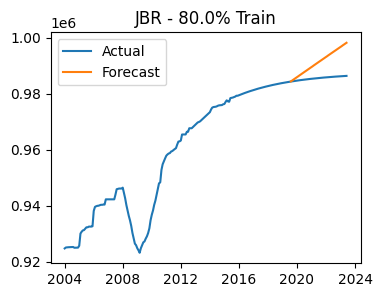

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


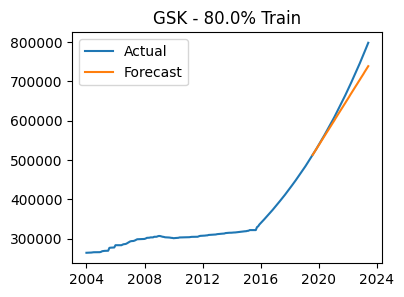

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


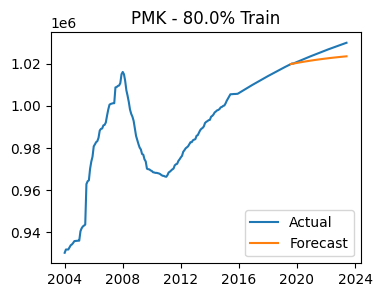

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


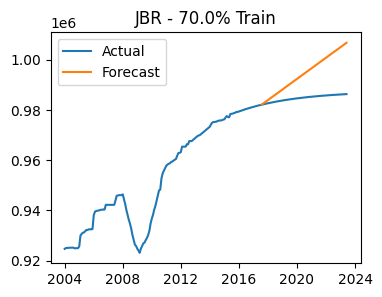

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


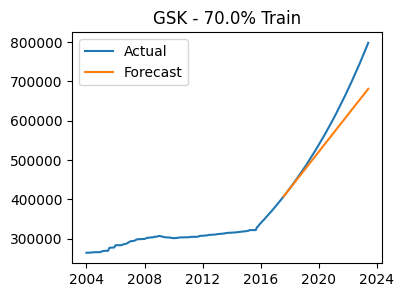

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


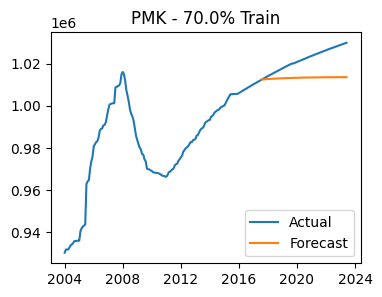

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


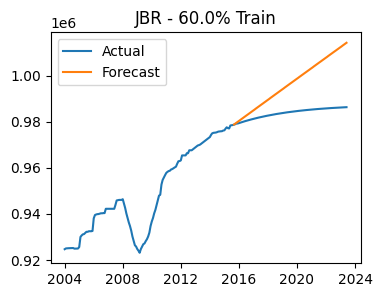

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


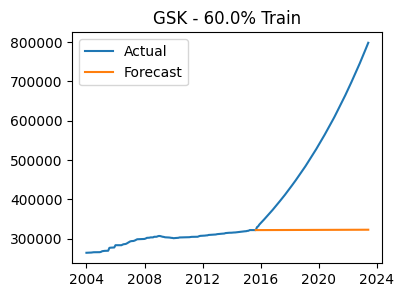

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


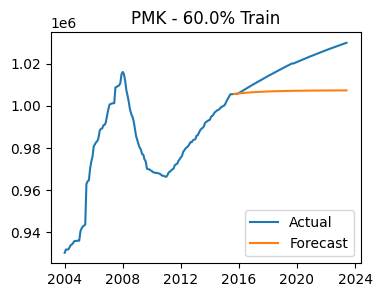

In [ ]:
# Plot Calling Plot Function
for train_size in scenarios:
    forecast_jbr, _, _, _, _, _, _, _, _, _ = arima_svm_hybrid(jbr, (1,1,1), train_size)
    plot_results(jbr, forecast_jbr, train_size, 'JBR')

    forecast_gsk, _, _, _, _, _, _, _, _, _ = arima_svm_hybrid(gsk, (1,2,1), train_size)
    plot_results(gsk, forecast_gsk, train_size, 'GSK')

    forecast_pmk, _, _, _, _, _, _, _, _, _ = arima_svm_hybrid(pmk, (1,1,5), train_size)
    plot_results(pmk, forecast_pmk, train_size, 'PMK')

In [ ]:
# Generate Function for Future Predition
def forecast_future(data, arima_order, steps=60):
    arima_model = ARIMA(data, order=arima_order)
    arima_result = arima_model.fit()

    arima_forecast = arima_result.forecast(steps=steps)

    X = np.arange(len(data)).reshape(-1, 1)
    y = arima_result.resid

    svm_model = SVR(kernel='rbf')
    svm_model.fit(X, y)

    svm_forecast = svm_model.predict(np.arange(len(data), len(data) + steps).reshape(-1, 1))

    hybrid_forecast = arima_forecast + svm_forecast

    return hybrid_forecast

In [ ]:
# Caliing Prediction Function
future_forecast_jbr = forecast_future(jbr, (1,1,1))
future_forecast_gsk = forecast_future(gsk, (1,2,1))
future_forecast_pmk = forecast_future(pmk, (1,1,5))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

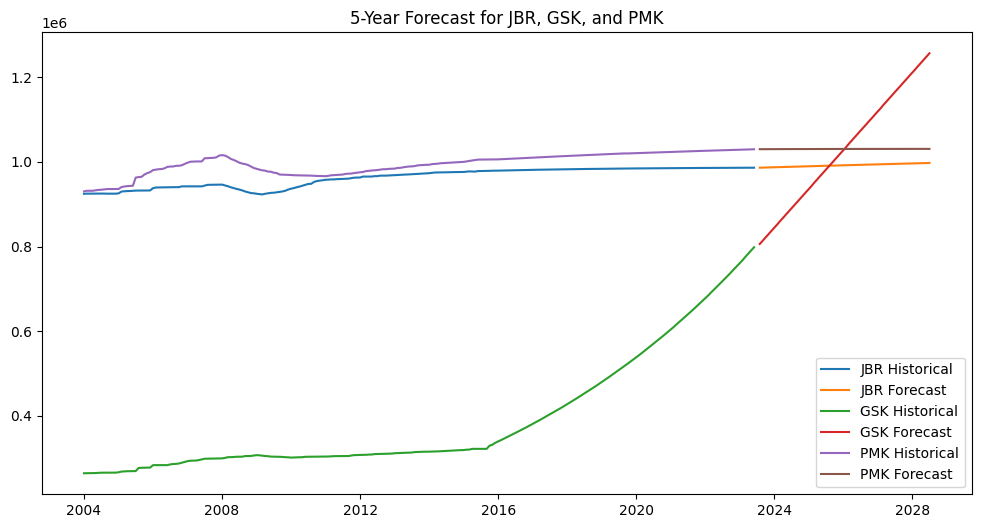

In [ ]:
#Prediction Plot
plt.figure(figsize=(12, 6))
plt.plot(jbr.index, jbr, label='JBR Historical')
plt.plot(pd.date_range(start=jbr.index[-1], periods=61, freq='M')[1:], future_forecast_jbr, label='JBR Forecast')
plt.plot(gsk.index, gsk, label='GSK Historical')
plt.plot(pd.date_range(start=gsk.index[-1], periods=61, freq='M')[1:], future_forecast_gsk, label='GSK Forecast')
plt.plot(pmk.index, pmk, label='PMK Historical')
plt.plot(pd.date_range(start=pmk.index[-1], periods=61, freq='M')[1:], future_forecast_pmk, label='PMK Forecast')
plt.title('5-Year Forecast for JBR, GSK, and PMK')
plt.legend()
plt.show()

In [ ]:
#Forecasting Result
print("\n5-Year Forecast for JBR:")
print(future_forecast_jbr)
print("\n5-Year Forecast for GSK:")
print(future_forecast_gsk)
print("\n5-Year Forecast for PMK:")
print(future_forecast_pmk)


5-Year Forecast for JBR:
2023-07-01    986352.676175
2023-08-01    986552.946452
2023-09-01    986752.833182
2023-10-01    986952.336674
2023-11-01    987151.457219
2023-12-01    987350.195095
2024-01-01    987548.550568
2024-02-01    987746.523889
2024-03-01    987944.115300
2024-04-01    988141.325033
2024-05-01    988338.153310
2024-06-01    988534.600347
2024-07-01    988730.666350
2024-08-01    988926.351522
2024-09-01    989121.656062
2024-10-01    989316.580163
2024-11-01    989511.124017
2024-12-01    989705.287814
2025-01-01    989899.071743
2025-02-01    990092.475995
2025-03-01    990285.500761
2025-04-01    990478.146234
2025-05-01    990670.412611
2025-06-01    990862.300093
2025-07-01    991053.808884
2025-08-01    991244.939196
2025-09-01    991435.691245
2025-10-01    991626.065257
2025-11-01    991816.061464
2025-12-01    992005.680104
2026-01-01    992194.921430
2026-02-01    992383.785698
2026-03-01    992572.273178
2026-04-01    992760.384151
2026-05-01    992948.1